In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow import keras
from tensorflow.keras import Model, Input, optimizers

from PIL import Image

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



In [2]:
import os
print(os.listdir("./aerial-cactus-identification"))

['sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [9]:
dataset = pd.read_csv('./aerial-cactus-identification/train.csv')


train_dir = os.listdir("./aerial-cactus-identification/train")
test_dir = os.listdir("./aerial-cactus-identification/test")

#train_dir, test_dir
dataset.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [10]:
#retrieving the images and storing them in the arrays
data = []
labels = []

for i in train_dir:
    try:
    
        image = cv2.imread("./aerial-cactus-identification/train/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        data.append(np.array(resize_img))
        
        labels.append(dataset[dataset['id'] == i]['has_cactus'].values[0])
        
        
    except AttributeError:
        print('Error')

In [11]:
cactus = np.array(data)
labels = np.array(labels)
cactus.shape,labels.shape

((17500, 64, 64, 3), (17500,))

In [12]:
#Shuffle the data
cactus,labels = shuffle(cactus,labels)


In [13]:
cactus = cactus.astype("float32")/255
labels = tf.keras.utils.to_categorical(labels)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(cactus,labels,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14000, 64, 64, 3), (3500, 64, 64, 3), (14000, 2), (3500, 2))

In [15]:


model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_1 (Activat

In [16]:
history = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_split=0.15)

Train on 11900 samples, validate on 2100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8
11900/11900 [==============================] - 121s 10ms/sample - loss: 0.2044 - acc: 0.9187 - val_loss: 0.1329 - val_acc: 0.9514
Epoch 2/8
11900/11900 [==============================] - 120s 10ms/sample - loss: 0.1119 - acc: 0.9567 - val_loss: 0.1152 - val_acc: 0.9490
Epoch 3/8
11900/11900 [==============================] - 119s 10ms/sample - loss: 0.0855 - acc: 0.9678 - val_loss: 0.0731 - val_acc: 0.9695
Epoch 4/8
11900/11900 [==============================] - 121s 10ms/sample - loss: 0.0698 - acc: 0.9744 - val_loss: 0.0633 - val_acc: 0.9771
Epoch 5/8
11900/11900 [==============================] - 174s 15ms/sample - loss: 0.0690 - acc: 0.9745 - val_loss: 0.0611 - val_acc: 0.9776
Epoch 6/8
11900/11900 [==============================] - 190s 16ms/sample - loss: 0.0560 - acc: 0.9796 - val_loss: 0.0427 - val_acc: 0.9852
Epoch 7/8
11900/11900 [==============================] - 189s 1

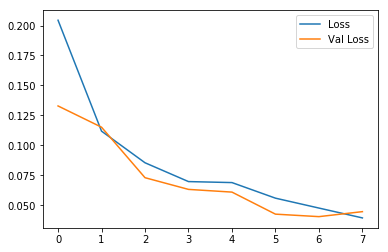

In [17]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend()

In [18]:
accuracy  = model.evaluate(x_test,y_test)
print("Test Accuracy:-",accuracy)

3500/3500 [==============================] - 18s 5ms/sample - loss: 0.0520 - acc: 0.9846
Test Accuracy:- [0.05204365394796644, 0.98457146]


In [19]:
#retrieving the images and storing them in the arrays
test_data = []

test_df = pd.read_csv('./aerial-cactus-identification/sample_submission.csv')
images = test_df['id'].values

for i in images:
    try:
    
        image = cv2.imread("./aerial-cactus-identification/test/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        test_data.append(np.array(resize_img))
                
        
    except AttributeError:
        print('Error')

In [20]:
test_cactus = np.array(test_data)
test_cactus = test_cactus.astype("float32")/255


In [21]:
test_cactus.shape

(4000, 64, 64, 3)

In [22]:
pred = model.predict(test_cactus)
test_df['has_cactus'] = pred
test_df.to_csv('aerial-cactus-submission.csv', index = False)